In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Polynomial Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14

Linear models

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$

$\begin{bmatrix} \vdots \\ \hat{y} \\ \vdots \end{bmatrix} = \beta_0
+ \beta_1 \begin{bmatrix} \vdots \\ x_1 \\ \vdots \end{bmatrix}
+ \beta_2 \begin{bmatrix} \vdots \\ x_2 \\ \vdots \end{bmatrix}
+ \dots
+ \beta_n \begin{bmatrix} \vdots \\ x_n \\ \vdots \end{bmatrix}$

$X = 
\begin{bmatrix} 
\vdots & \vdots & & \vdots \\ 
x_1 & x_2 & \dots & x_n \\ 
\vdots & \vdots & & \vdots 
\end{bmatrix}$

A simple linear model for $\hat{y} = f(x)$

$\hat{y} = \beta_0 + \beta_1 x$

Extending this to a $3^{rd}$ degree polynomial model

$\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

A simple linear model for $\hat{y} = f(x_1, x_2)$

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

Extending this to a $2^{nd}$ degree polynomial model

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$

$x_1 x_2$ is an interaction term between $x_1$ and $x_2$

### Reparameterize the model

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$

$\begin{matrix}
x_3 & \rightarrow & x_1^2 \\
x_4 & \rightarrow & x_2^2 \\
x_5 & \rightarrow & x_1 x_2
\end{matrix}$

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5$

**!!! But that's just a linear model**

Given the matrix of measured features $X$:

$X = 
\begin{bmatrix} 
\vdots & \vdots \\ 
x_1 & x_2 \\ 
\vdots & \vdots
\end{bmatrix}$

All you need to do is fit a linear model using the following feature matrix $X_{poly}$:

$X_{poly} = 
\begin{bmatrix} 
\vdots & \vdots & \vdots & \vdots & \vdots \\ 
x_1 & x_2 & x_1^2 & x_2^2 & x_1 x_2 \\ 
\vdots & \vdots & \vdots & \vdots & \vdots 
\end{bmatrix}$

### Some experimental data: Temperature vs. Yield

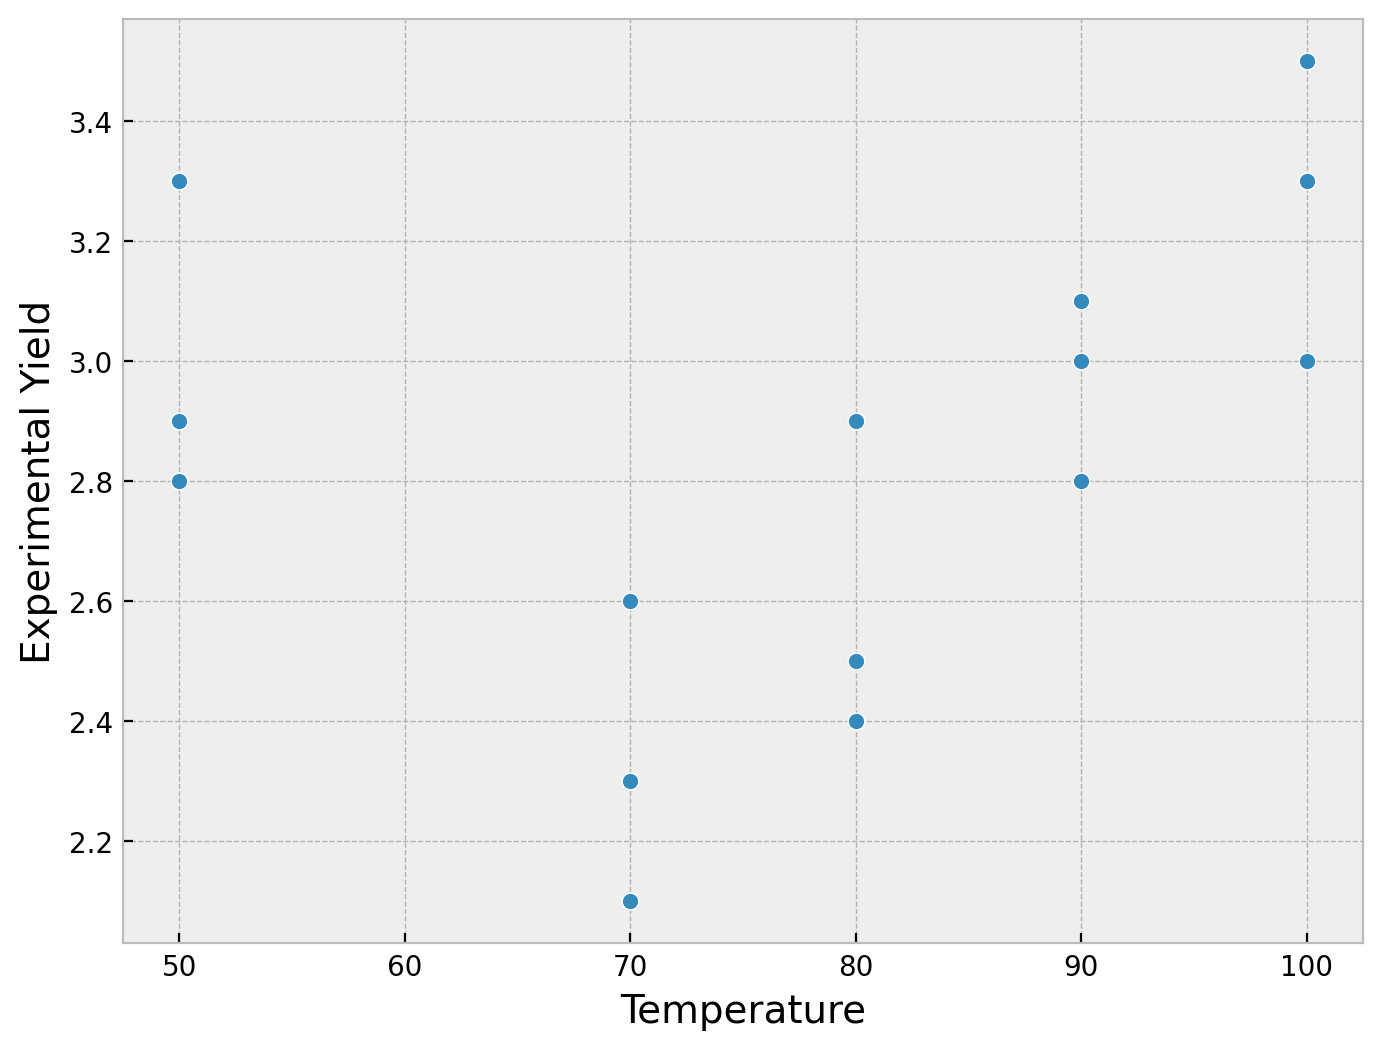

In [3]:
temperature = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100])
experimental_yield = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3, 3.1, 2.8, 3.3, 3.5, 3])

plt.plot(temperature, experimental_yield, 'o')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield');

Rearranging the data for use with sklearn

In [4]:
X = temperature.reshape([-1,1])
y = experimental_yield

X.shape, y.shape

((15, 1), (15,))

Fit yield vs. temperature data with a linear model

In [5]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X, y);

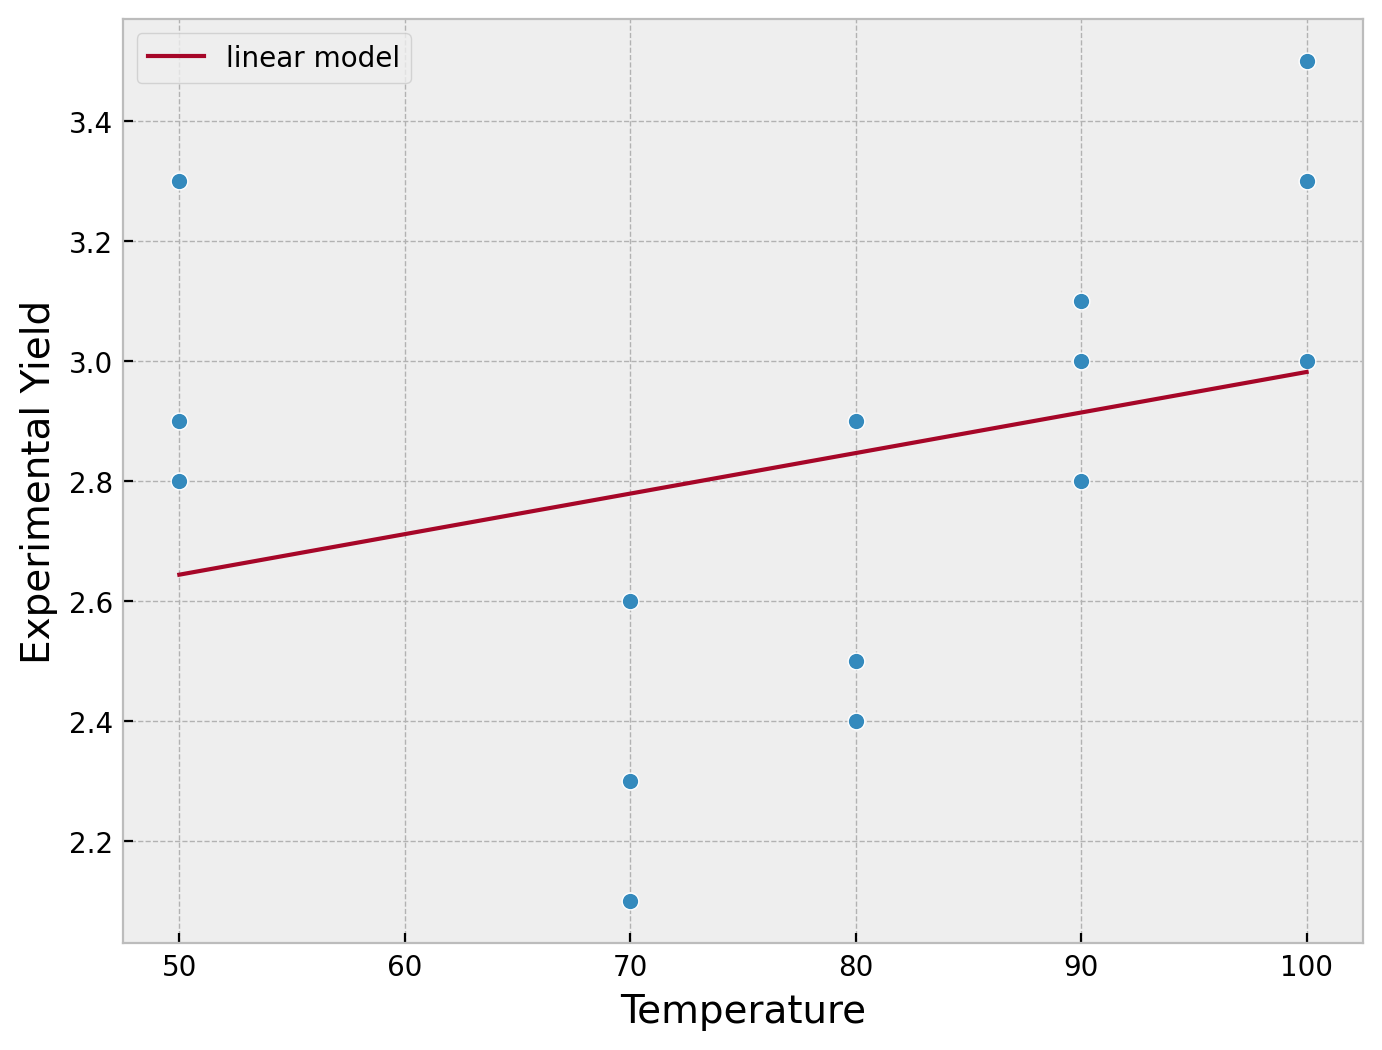

In [6]:
# fit line
Xrange = np.linspace(X.min(), X.max(), 100).reshape([-1,1])

plt.plot(temperature, experimental_yield, 'o')
plt.plot(Xrange, lin_model.predict(Xrange), '-', label='linear model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

### Fit yield vs. temperature data with a $2^{nd}$ degree polynomial model

In [7]:
X_poly2 = np.hstack([X, X**2])

pd.DataFrame(X_poly2, columns=['x', 'x^2'])

,x,x^2
0,50,2500
1,50,2500
2,50,2500
3,70,4900
4,70,4900
5,70,4900
6,80,6400
7,80,6400
8,80,6400
9,90,8100


In [8]:
from sklearn.preprocessing import PolynomialFeatures

lin2poly2 = PolynomialFeatures(degree=2)

X_poly2 = lin2poly2.fit_transform(X)

pd.DataFrame(X_poly2, columns=['intercept', 'x', 'x^2'])

,intercept,x,x^2
0,1.0,50.0,2500.0
1,1.0,50.0,2500.0
2,1.0,50.0,2500.0
3,1.0,70.0,4900.0
4,1.0,70.0,4900.0
5,1.0,70.0,4900.0
6,1.0,80.0,6400.0
7,1.0,80.0,6400.0
8,1.0,80.0,6400.0
9,1.0,90.0,8100.0


A column of ones in the feature matrix represents a y-intercept.

In [9]:
lin2poly2 = PolynomialFeatures(degree=2, include_bias=False)

X_poly2 = lin2poly2.fit_transform(X)

pd.DataFrame(X_poly2, columns=['x', 'x^2'])

,x,x^2
0,50.0,2500.0
1,50.0,2500.0
2,50.0,2500.0
3,70.0,4900.0
4,70.0,4900.0
5,70.0,4900.0
6,80.0,6400.0
7,80.0,6400.0
8,80.0,6400.0
9,90.0,8100.0


The model:

In [10]:
poly2_model = LinearRegression()
poly2_model.fit(X_poly2, y);

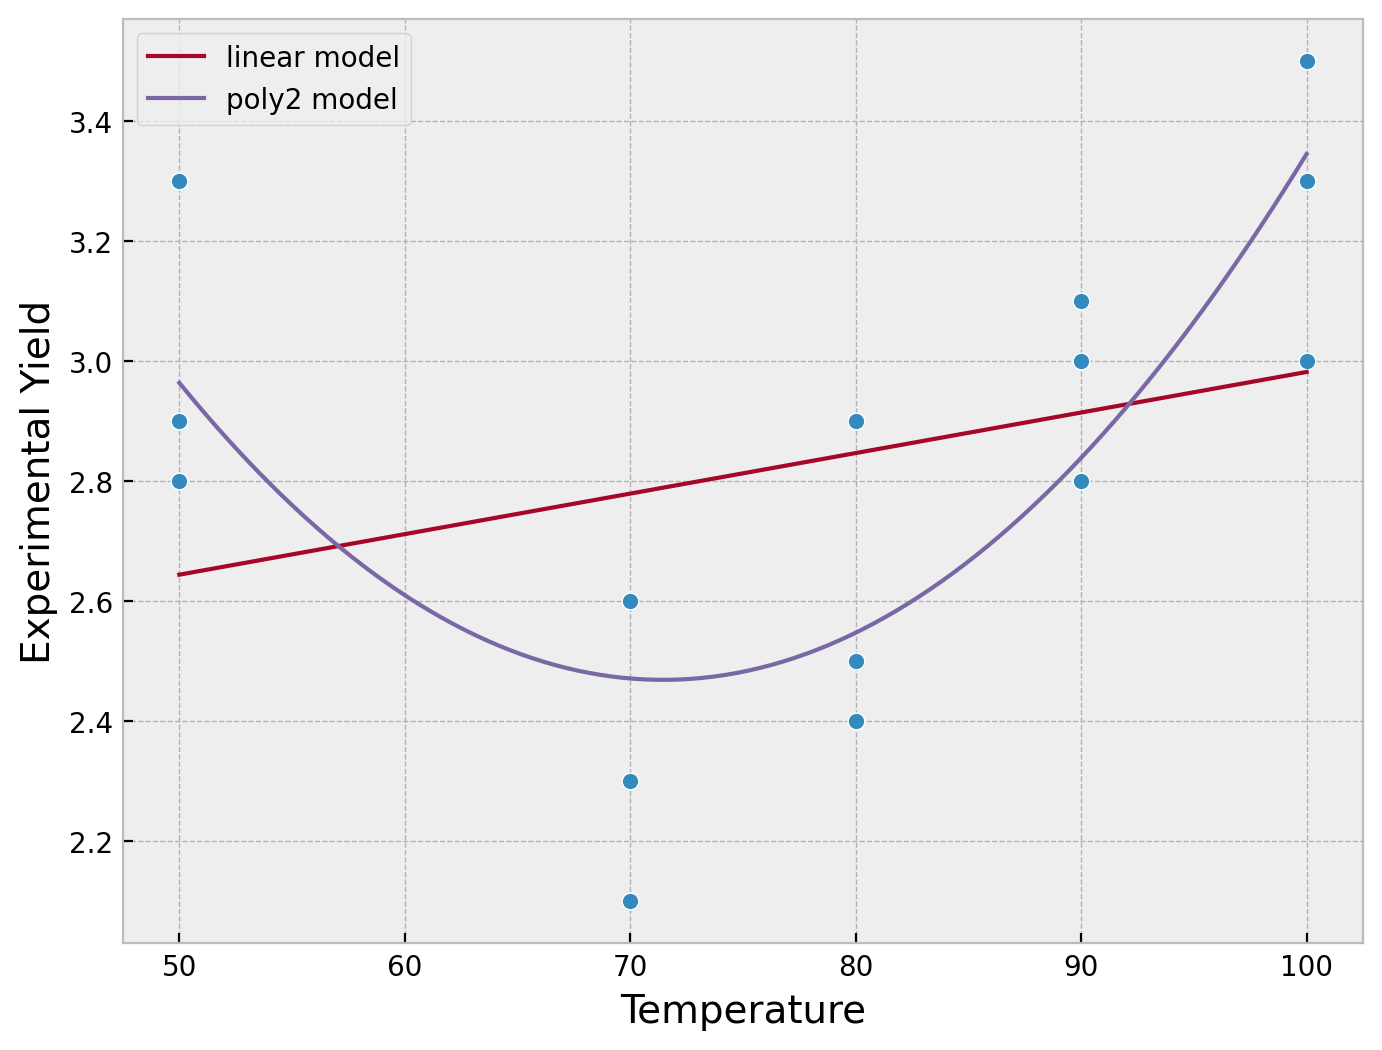

In [11]:
# fit lines
plt.plot(temperature, experimental_yield, 'o')
plt.plot(Xrange, lin_model.predict(Xrange), '-', label='linear model')
plt.plot(Xrange, poly2_model.predict(lin2poly2.fit_transform(Xrange)), '-', label='poly2 model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

How to compare the models?

In [12]:
lin_MSE = ((y - lin_model.predict(X))**2).mean()
poly2_MSE = ((y - poly2_model.predict(X_poly2))**2).mean()

lin_R2 = lin_model.score(X, y)
poly2_R2 = poly2_model.score(X_poly2, y)

pd.DataFrame([[lin_MSE, poly2_MSE], 
              [lin_R2, poly2_R2]], 
             columns=['linear', 'poly2'], 
             index=['MSE', 'R^2'])

,linear,poly2
MSE,0.132709,0.047785
R^2,0.092418,0.673205


Residuals can also tell us a lot.

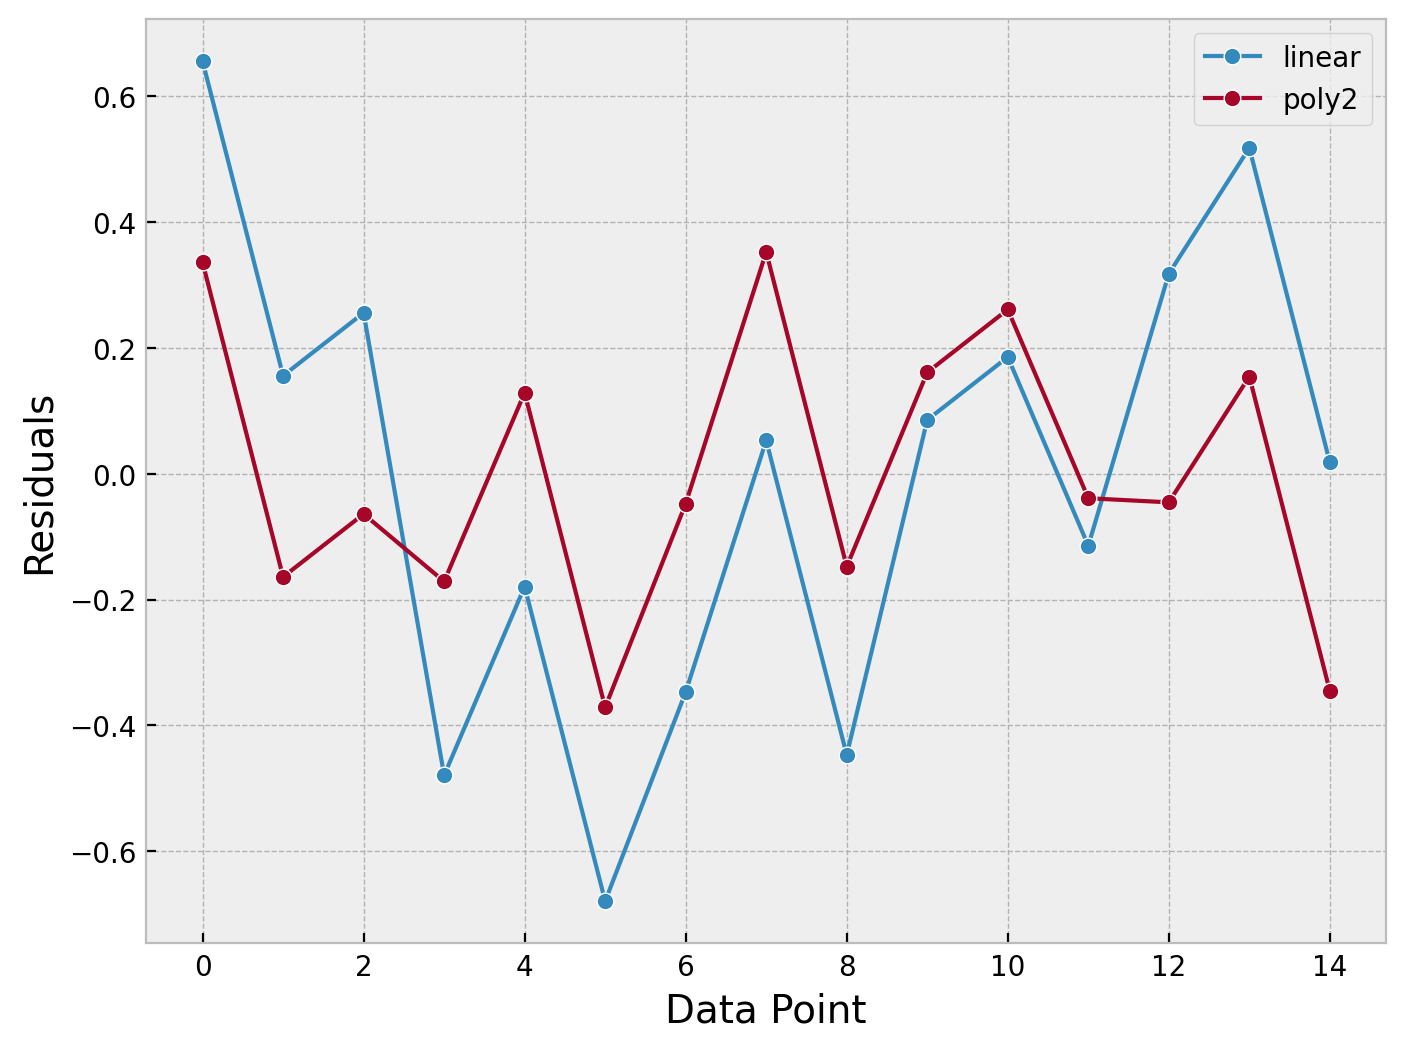

In [13]:
lin_residuals = y - lin_model.predict(X)
poly2_residuals = y - poly2_model.predict(X_poly2)

plt.plot(lin_residuals, 'o-', label='linear')
plt.plot(poly2_residuals, 'o-', label='poly2')
plt.xlabel('Data Point')
plt.ylabel('Residuals')
plt.legend();

### Fit yield vs. temperature data with a $3^{rd}$ degree polynomial model

In [14]:
lin2poly3 = PolynomialFeatures(degree=3, include_bias=False)

X_poly3 = lin2poly3.fit_transform(X)

pd.DataFrame(X_poly3, columns=['x', 'x^2', 'x^3'])

,x,x^2,x^3
0,50.0,2500.0,125000.0
1,50.0,2500.0,125000.0
2,50.0,2500.0,125000.0
3,70.0,4900.0,343000.0
4,70.0,4900.0,343000.0
5,70.0,4900.0,343000.0
6,80.0,6400.0,512000.0
7,80.0,6400.0,512000.0
8,80.0,6400.0,512000.0
9,90.0,8100.0,729000.0


The model:

In [15]:
poly3_model = LinearRegression()
poly3_model.fit(X_poly3, y);

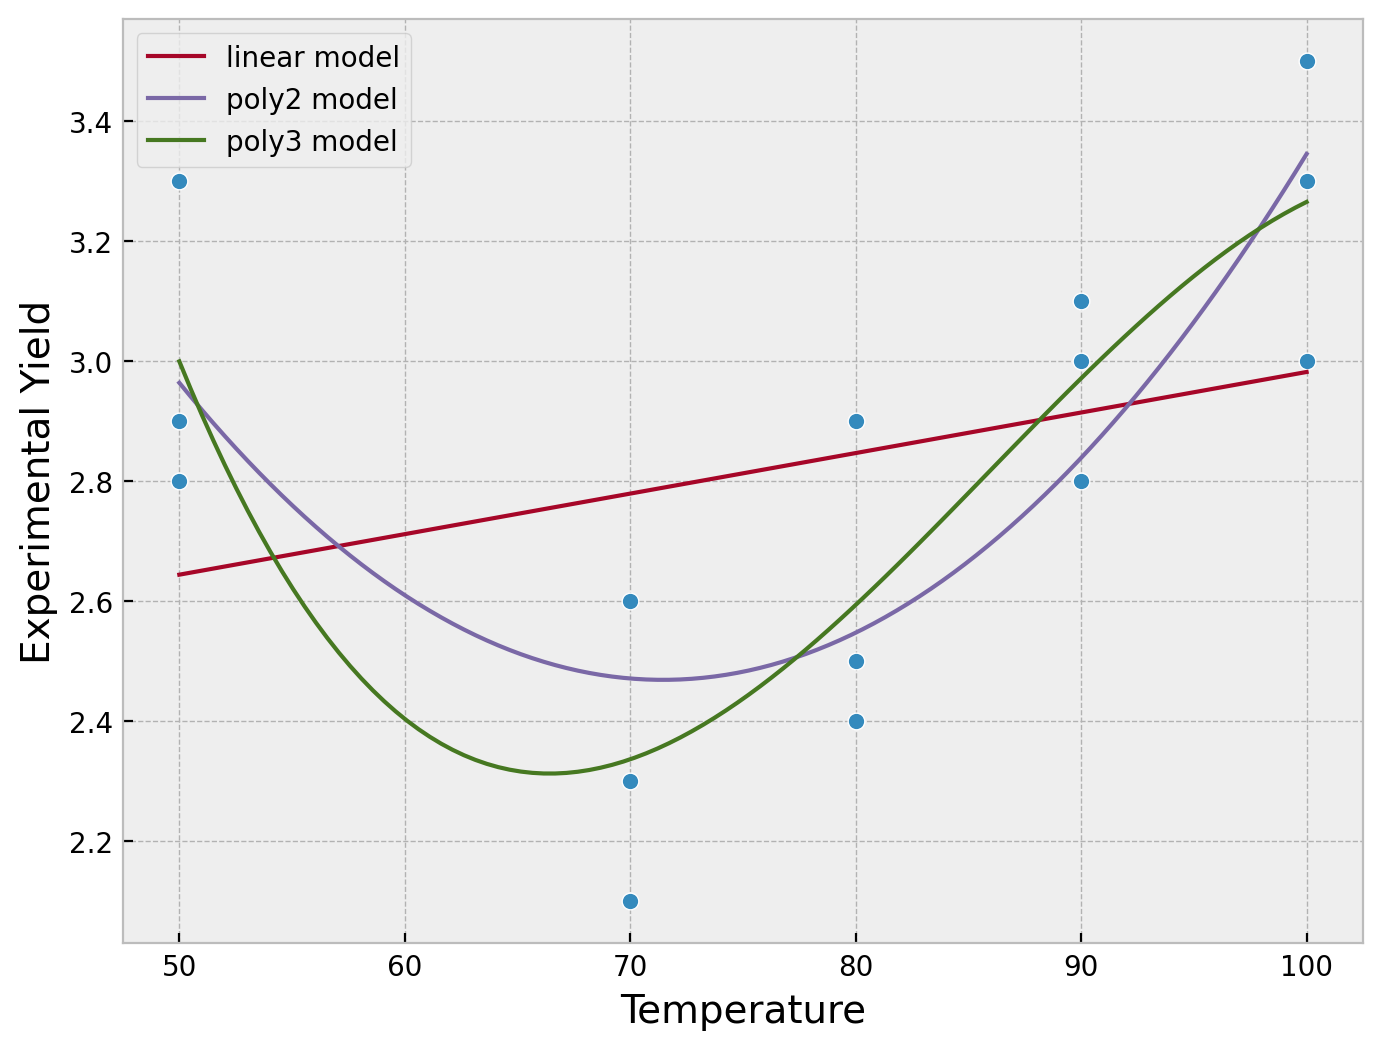

In [16]:
# fit lines
plt.plot(temperature, experimental_yield, 'o')
plt.plot(Xrange, lin_model.predict(Xrange), '-', label='linear model')
plt.plot(Xrange, poly2_model.predict(lin2poly2.fit_transform(Xrange)), '-', label='poly2 model')
plt.plot(Xrange, poly3_model.predict(lin2poly3.fit_transform(Xrange)), '-', label='poly3 model')
plt.xlabel('Temperature')
plt.ylabel('Experimental Yield')
plt.legend();

Compare models:

In [17]:
poly3_MSE = ((y - poly3_model.predict(X_poly3))**2).mean()

poly3_R2 = poly3_model.score(X_poly3, y)

pd.DataFrame([[lin_MSE, poly2_MSE, poly3_MSE], 
              [lin_R2, poly2_R2, poly3_R2]], 
             columns=['linear', 'poly2', 'poly3'], 
             index=['MSE', 'R^2'])

,linear,poly2,poly3
MSE,0.132709,0.047785,0.038681
R^2,0.092418,0.673205,0.735462


Polynomial fit is clearly better than a linear fit, but which degree polynomial should we use?

Why not try a range of polynomial degrees, and see which one is best?

But how do we determine which degree is best?

e.g., Although the $3^{rd}$ degree model has a slightly better $MSE$ and $R^2$ than the $2^{nd}$ degree model, is it overfitting noise in the data?

!!!This is crucial to our analysis.